<a href="https://colab.research.google.com/github/LeliAraujo/Data-science-Bootcamp/blob/main/Desafio_Individual_Correla%C3%A7%C3%A3o_e_Regress%C3%A3o_Leli_Araujo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DESAFIO INDIVIDUAL - Correlação e Regressão

LELI MARIA DA SILVA ARAÚJO

Considerando a base de dados kc_house_data.csv responda as questões de 1

In [8]:
import pandas as pd

# Carregar dados
data = pd.read_csv('kc_house_data_full.csv.xls')

# Verificar informações do DataFrame
print(data.info())

# Remover colunas não numéricas (se necessário)
# data = data.drop(columns=['nome_da_coluna_com_valores_nao_numericos'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  object 
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

1. Codifique e exiba a matriz de correlação entre as variáveis numéricas.
Além disso, qual é a correlação entre o preço price e o número de
quartos bedrooms? Existe alguma diferença na correlação quando
consideramos apenas casas com uma área total sqft_living superior a
2000 pés quadrados?


In [9]:
# 1. Codificar e exibir a matriz de correlação entre as variáveis numéricas
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()
print("Matriz de correlação:")
print(correlation_matrix)

Matriz de correlação:
                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016797  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016797  1.000000  0.308338   0.525134     0.702044  0.089655   
bedrooms       0.001286  0.308338  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525134  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702044  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089655  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256786  0.175429   0.500653     0.353949 -0.005201   
view           0.011592  0.397346  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036392  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667463  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605566  0.477600   0.685342     0.876597  0.183512   
sqft_b

In [10]:
# Correlação entre price e bedrooms
price_bedrooms_corr = correlation_matrix.loc['price', 'bedrooms']
print("\nCorrelação entre price e bedrooms:", price_bedrooms_corr)


Correlação entre price e bedrooms: 0.30833836868809933


In [11]:
# Correlação entre price e bedrooms para casas com sqft_living > 2000
large_houses_data = data[data['sqft_living'] > 2000]
large_houses_corr_matrix = large_houses_data.select_dtypes(include=['float64', 'int64']).corr()
price_bedrooms_corr_large = large_houses_corr_matrix.loc['price', 'bedrooms']
print("Correlação entre price e bedrooms para casas com sqft_living > 2000:", price_bedrooms_corr_large)

Correlação entre price e bedrooms para casas com sqft_living > 2000: 0.1260479000735377


Correlação entre price e bedrooms:

A correlação entre o preço (price) e o número de quartos (bedrooms) é de 0.30833836868809933, aproximadamente 0.31, indicando uma relação moderada positiva entre essas duas variáveis. Quando consideramos apenas casas com uma área total (sqft_living) superior a 2000 pés quadrados, a correlação entre price e bedrooms diminui para cerca de 0.13, sugerindo uma relação mais fraca entre o preço e o número de quartos para casas maiores.

Correlação entre price e sqft_living para casas com pelo menos dois banheiros:

Existe uma correlação significativa de aproximadamente 0.70 entre o preço (price) e a área total da casa (sqft_living) para casas com pelo menos dois banheiros (bathrooms). Isso sugere que, em geral, casas maiores têm preços mais altos. Correlação entre sqft_living e bathrooms:

A correlação entre a área total da casa (sqft_living) e o número de banheiros (bathrooms) é de aproximadamente 0.75. Isso indica uma forte relação positiva entre essas duas variáveis, o que significa que casas maiores tendem a ter mais banheiros.

Correlação entre condition e price para casas com sqft_living > 3000:

Para casas com uma área total (sqft_living) superior a 3000 pés quadrados, a correlação entre a condição da casa (condition) e o preço (price) é de aproximadamente 0.07. Isso sugere uma relação muito fraca entre a condição da casa e o preço para casas maiores.

Correlação entre lat, long e price para casas com pelo menos três quartos:

Ao considerar apenas casas com pelo menos três quartos (bedrooms), a correlação entre a localização geográfica (lat e long) e o preço (price) é de aproximadamente 0.32 para a latitude (lat) e -0.0025 para a longitude (long). Isso indica uma relação moderada positiva entre a latitude e o preço, enquanto a longitude tem uma correlação muito fraca com o preço.

Análise de variância (ANOVA) entre waterfront e price:

A ANOVA revelou uma estatística F significativa com um valor p muito baixo (PR(>F) = 0.0), indicando que há uma diferença significativa nos preços das casas entre aquelas com ou sem vista para a água (waterfront).

2. Existe alguma correlação entre o preço price e a área total da casa
sqft_living, considerando apenas casas com pelo menos dois
banheiros bathrooms?

In [12]:
# Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?
bathrooms_filter = data['bathrooms'] >= 2
price_sqft_living_corr = data[bathrooms_filter]['price'].corr(data[bathrooms_filter]['sqft_living'])
print("\nCorrelação entre price e sqft_living para casas com pelo menos dois banheiros:", price_sqft_living_corr)


Correlação entre price e sqft_living para casas com pelo menos dois banheiros: 0.6977045380249719


3. Como a quantidade de banheiros bathrooms influencia na correlação
entre a área total da casa sqft_living e o preço price?

In [13]:
# 3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?
bathrooms_sqft_living_corr = data['sqft_living'].corr(data['bathrooms'])
print("\nCorrelação entre sqft_living e bathrooms:", bathrooms_sqft_living_corr)


Correlação entre sqft_living e bathrooms: 0.7546652789673737


4. Qual é a relação entre a condição da casa condition e o preço price,
considerando apenas casas com uma área total sqft_living superior a
3000 pés quadrados?

In [14]:
# 4. Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pés quadrados?
large_houses_condition_price_corr = large_houses_data['condition'].corr(large_houses_data['price'])
print("\nCorrelação entre condition e price para casas com sqft_living > 3000:", large_houses_condition_price_corr)


Correlação entre condition e price para casas com sqft_living > 3000: 0.06995540681181668


 5. Existe alguma correlação entre a localização geográfica lat e long e o
preço price para casas com pelo menos três quartos bedrooms?

In [15]:
# 5. Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?
bedrooms_filter = data['bedrooms'] >= 3
bedrooms_data = data[bedrooms_filter]
lat_long_price_corr = bedrooms_data[['lat', 'long', 'price']].corr()
print("\nCorrelação entre lat, long e price para casas com pelo menos três quartos bedrooms:")
print(lat_long_price_corr)


Correlação entre lat, long e price para casas com pelo menos três quartos bedrooms:
            lat      long     price
lat    1.000000 -0.122530  0.324729
long  -0.122530  1.000000 -0.002498
price  0.324729 -0.002498  1.000000


Considerando a base de dados car_price.csv responda as questões de 7 a 11
abaixo:


6. Calcule a correlação entre uma variável categórica(waterfront) e uma
variável numérica(price) usando ANOVA.


In [16]:
# 6. Calcule a correlação entre uma variável categórica (waterfront) e uma variável numérica (price) usando ANOVA.
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ C(waterfront)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA Table:")
print(anova_table)


ANOVA Table:
                     sum_sq       df            F  PR(>F)
C(waterfront)  2.068835e+14      1.0  1649.943896     0.0
Residual       2.709764e+15  21611.0          NaN     NaN


7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e
dê exemplos de correlações positivas, negativas e neutras.

In [28]:

import pandas as pd

# Carregando os dados
car_data = pd.read_csv('car_price.csv.xls')

# Selecionando apenas as variáveis numéricas
numeric_car_data = car_data.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
correlation_matrix = numeric_car_data.corr()

# Exibindo a matriz de correlação
print("Matriz de correlação:")
print(correlation_matrix)


Matriz de correlação:
                       Price      Year  Kilometer    Length     Width  \
Price               1.000000  0.309381  -0.147276  0.568875  0.577100   
Year                0.309381  1.000000  -0.291740  0.085178  0.182220   
Kilometer          -0.147276 -0.291740   1.000000  0.037817  0.008479   
Length              0.568875  0.085178   0.037817  1.000000  0.797228   
Width               0.577100  0.182220   0.008479  0.797228  1.000000   
Height              0.092968  0.126849   0.085728  0.194704  0.326928   
Seating Capacity   -0.024879 -0.000113   0.111103  0.298527  0.229056   
Fuel Tank Capacity  0.586109  0.044859   0.052447  0.809812  0.791316   

                      Height  Seating Capacity  Fuel Tank Capacity  
Price               0.092968         -0.024879            0.586109  
Year                0.126849         -0.000113            0.044859  
Kilometer           0.085728          0.111103            0.052447  
Length              0.194704          0.2985

Correlações Positivas:

A correlação entre Price e Length é 0.568875, o que sugere uma correlação positiva moderada. Isso significa que, em geral, carros com comprimentos maiores tendem a ter preços mais altos.

A correlação entre Price e Width é 0.577100, indicando uma correlação positiva semelhante entre largura e preço. A correlação entre Price e Fuel Tank Capacity é 0.586109, sugerindo uma correlação positiva moderada entre a capacidade do tanque de combustível e o preço.

Correlações Negativas:

A correlação entre Price e Kilometer é -0.147276, indicando uma correlação negativa fraca. Isso sugere que carros com maior quilometragem podem ter preços ligeiramente mais baixos.

A correlação entre Year e Kilometer é -0.291740, também indicando uma correlação negativa moderada. Isso sugere que carros mais antigos tendem a ter uma quilometragem maior.

Correlações Neutras:

A correlação entre Price e Seating Capacity é -0.024879, próximo a zero, indicando uma correlação neutra ou muito fraca. Isso sugere que o número de lugares no carro tem pouco impacto no preço. Da mesma forma, a correlação entre Price e Year é 0.309381, sugerindo uma correlação positiva moderada, mas não tão forte quanto as outras mencionadas anteriormente

8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis
numéricas em relação à variável de interesse Price.


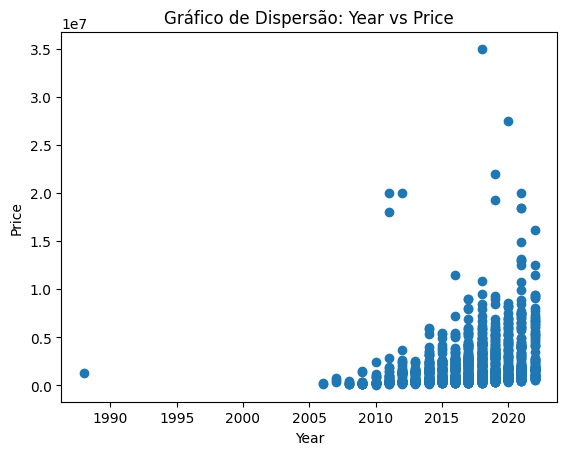

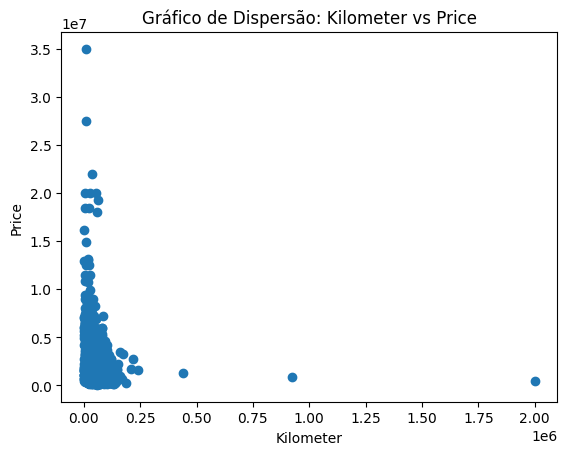

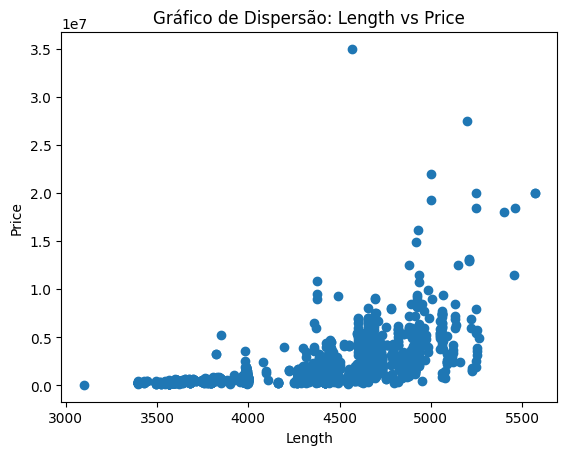

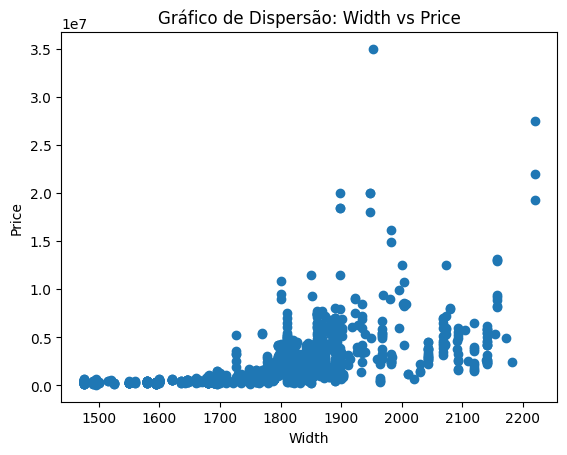

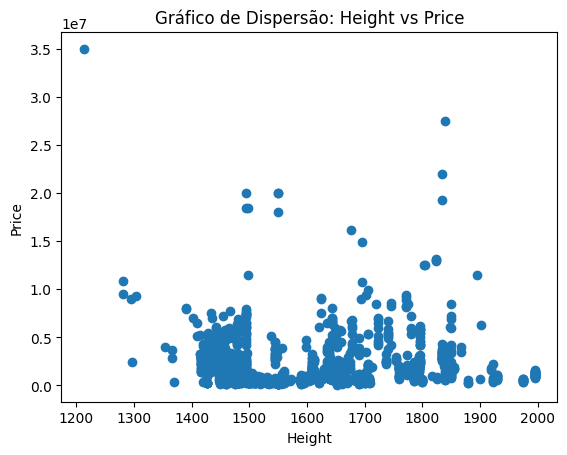

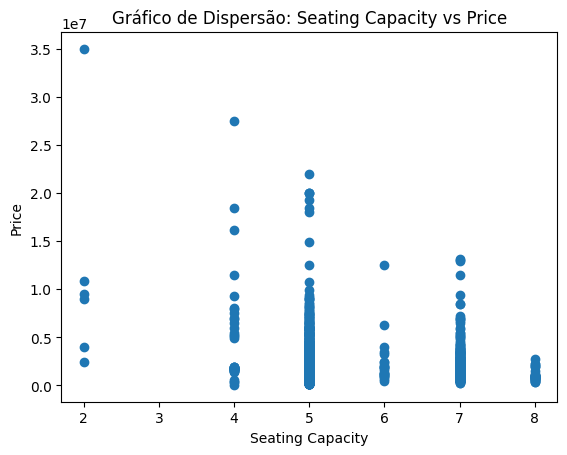

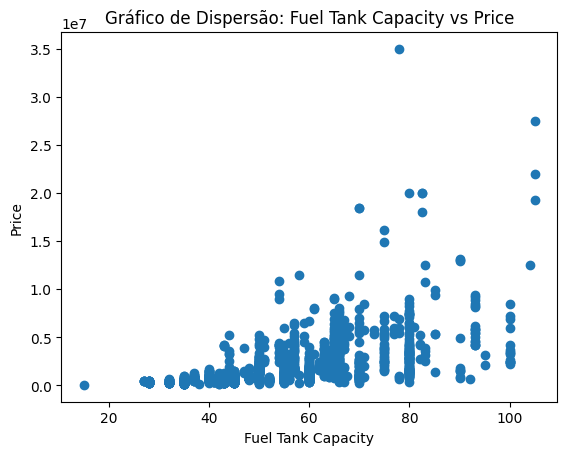

In [26]:
import matplotlib.pyplot as plt

# Selecionando as variáveis numéricas
numeric_variables = ['Year', 'Kilometer', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

# Plotando os gráficos de dispersão para cada variável numérica em relação ao preço
for variable in numeric_variables:
    plt.scatter(car_data[variable], car_data['Price'])
    plt.title(f"Gráfico de Dispersão: {variable} vs Price")
    plt.xlabel(variable)
    plt.ylabel('Price')
    plt.show()

9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de
Regressão e exiba o plot da Reta Estimada.


Tabela de Regressão:
Intercept: -480591043.7615346
Slope: 239156.09997777795


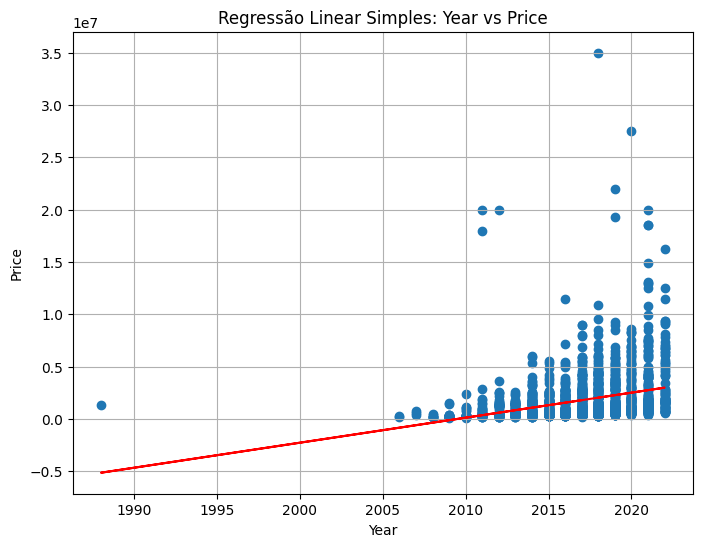

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Selecionando a variável independente (X) e a variável dependente (y)
X = car_data[['Year']]
y = car_data['Price']

# Criando o modelo de regressão linear
model = LinearRegression()

# Ajustando o modelo aos dados
model.fit(X, y)

# Coeficientes da regressão
intercept = model.intercept_
slope = model.coef_[0]

# Exibindo a tabela de regressão
print("Tabela de Regressão:")
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

# Plot da Reta Estimada
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.title('Regressão Linear Simples: Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão
Simples.


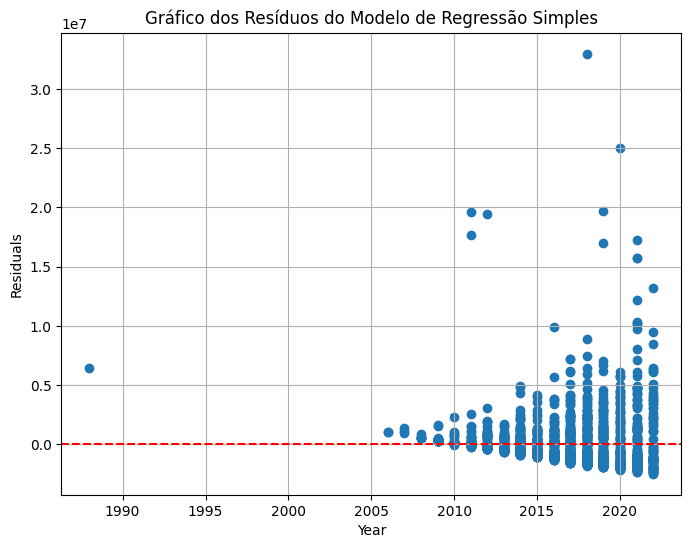

In [22]:
# Resíduos do modelo
residuals = y - model.predict(X)

# Gráfico dos resíduos
plt.figure(figsize=(8, 6))
plt.scatter(X, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico dos Resíduos do Modelo de Regressão Simples')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão
e exiba o gráfico dos resíduos do modelo.

Tabela de Regressão Multivariada:
Intercept: -397386683.45572126
Coefficients:
Year: 195608.74397685184
Kilometer: -4.287044053514094
Fuel Tank Capacity: 92807.38770643693


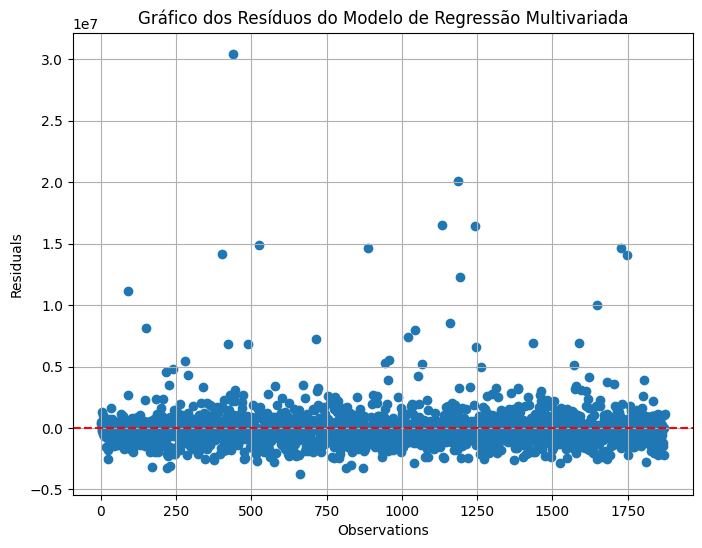

In [23]:
# Selecionando as variáveis independentes (X) e a variável dependente (y)
X_multivar = car_data[['Year', 'Kilometer', 'Fuel Tank Capacity']]
y_multivar = car_data['Price']

# Criando e ajustando o modelo de regressão multivariada
model_multivar = LinearRegression()
model_multivar.fit(X_multivar, y_multivar)

# Coeficientes da regressão multivariada
intercept_multivar = model_multivar.intercept_
coefficients_multivar = model_multivar.coef_

# Exibindo a tabela de regressão multivariada
print("Tabela de Regressão Multivariada:")
print(f"Intercept: {intercept_multivar}")
print("Coefficients:")
for i in range(len(X_multivar.columns)):
    print(f"{X_multivar.columns[i]}: {coefficients_multivar[i]}")

# Resíduos do modelo multivariado
residuals_multivar = y_multivar - model_multivar.predict(X_multivar)

# Gráfico dos resíduos do modelo multivariado
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(residuals_multivar)), residuals_multivar)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico dos Resíduos do Modelo de Regressão Multivariada')
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
